In [552]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [553]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kukuroo3/body-signal-of-smoking")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [554]:
os.listdir('/kaggle/input/')

['smoking.csv', 'competition_format']

In [555]:
df = pd.read_csv('/kaggle/input/smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [556]:
df.shape

(55692, 27)

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [558]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [559]:
df.duplicated().sum()

0

In [560]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [561]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [562]:
df['smoking'].value_counts()

smoking
0    35237
1    20455
Name: count, dtype: int64

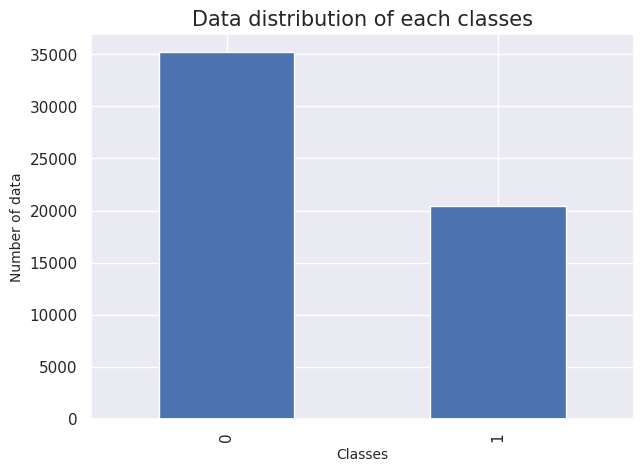

In [563]:
df['smoking'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [564]:
df1 = df[df['smoking'] == 1]
df2 = df[df['smoking'] == 0].sample(df1.shape[0])

In [565]:
df_balanced = pd.concat([df1, df2])

In [566]:
df_balanced.shape

(40910, 27)

In [567]:
df_balanced['smoking'].value_counts()

smoking
1    20455
0    20455
Name: count, dtype: int64

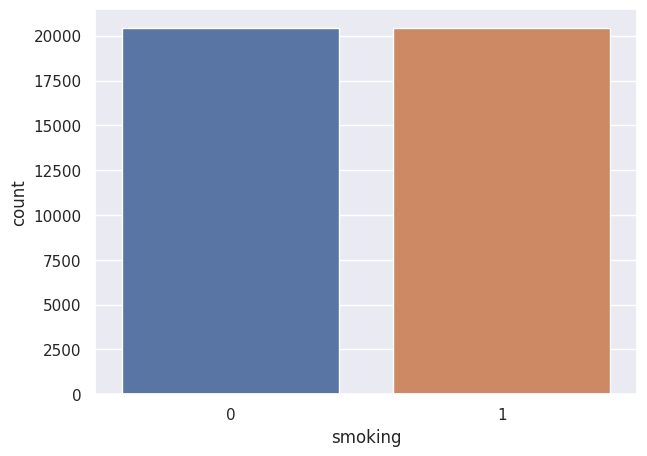

In [568]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df_balanced, x = 'smoking')
plt.show()

In [569]:
df_balanced.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,...,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,27854.453557,43.601442,165.675752,66.959179,82.627372,1.021648,1.018328,1.024664,1.025373,121.813786,...,56.576949,114.418431,14.797883,1.089709,0.899983,26.483134,27.886629,43.362234,0.224811,0.500000
std,16065.640277,11.977786,8.928508,12.809107,9.222859,0.481230,0.484023,0.155101,0.157256,13.560372,...,14.625274,39.403569,1.519515,0.413028,0.227598,19.800319,30.245214,54.461999,0.417463,0.500006
min,1.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,5.000000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13923.250000,35.000000,160.000000,60.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,46.000000,91.000000,13.800000,1.000000,0.800000,19.000000,16.000000,18.000000,0.000000,0.000000
50%,27919.000000,40.000000,165.000000,65.000000,82.300000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,112.000000,15.000000,1.000000,0.900000,23.000000,22.000000,28.000000,0.000000,0.500000
75%,41717.500000,50.000000,170.000000,75.000000,88.800000,1.200000,1.200000,1.000000,1.000000,130.000000,...,65.000000,136.000000,15.900000,1.000000,1.000000,29.000000,32.000000,48.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2062.000000,999.000000,1.000000,1.000000


In [570]:
df_balanced.drop(columns = ['ID'], axis = 1, inplace = True)

In [571]:
df_balanced.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [572]:
df_balanced['height(m)'] = df_balanced['height(cm)'] / 100

In [573]:
df_balanced.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,height(m)
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,1.70
6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,...,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1,1.60
12,M,35,170,70,81.0,1.5,1.0,1.0,1.0,130.0,...,1.0,0.9,21.0,27.0,83.0,Y,0,N,1,1.70
17,M,35,165,70,87.5,1.0,0.8,1.0,1.0,112.0,...,1.0,0.9,37.0,43.0,30.0,Y,0,Y,1,1.65
18,M,60,165,65,79.0,1.0,1.0,1.0,1.0,124.0,...,1.0,0.9,23.0,19.0,36.0,Y,0,N,1,1.65


In [574]:
df_balanced['height(m)2'] = df_balanced['height(m)'] * df_balanced['height(m)']

In [575]:
df_balanced.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,height(m),height(m)2
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,1.0,21.0,16.0,22.0,Y,0,N,1,1.70,2.8900
6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,...,0.7,21.0,27.0,39.0,Y,1,Y,1,1.60,2.5600
12,M,35,170,70,81.0,1.5,1.0,1.0,1.0,130.0,...,0.9,21.0,27.0,83.0,Y,0,N,1,1.70,2.8900
17,M,35,165,70,87.5,1.0,0.8,1.0,1.0,112.0,...,0.9,37.0,43.0,30.0,Y,0,Y,1,1.65,2.7225
18,M,60,165,65,79.0,1.0,1.0,1.0,1.0,124.0,...,0.9,23.0,19.0,36.0,Y,0,N,1,1.65,2.7225


In [576]:
df_balanced['bmi'] = df_balanced['weight(kg)'] / df_balanced['height(m)2']

In [577]:
df_balanced.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,oral,dental caries,tartar,smoking,height(m),height(m)2,bmi
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,21.0,16.0,22.0,Y,0,N,1,1.70,2.8900,20.761246
6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,...,21.0,27.0,39.0,Y,1,Y,1,1.60,2.5600,23.437500
12,M,35,170,70,81.0,1.5,1.0,1.0,1.0,130.0,...,21.0,27.0,83.0,Y,0,N,1,1.70,2.8900,24.221453
17,M,35,165,70,87.5,1.0,0.8,1.0,1.0,112.0,...,37.0,43.0,30.0,Y,0,Y,1,1.65,2.7225,25.711662
18,M,60,165,65,79.0,1.0,1.0,1.0,1.0,124.0,...,23.0,19.0,36.0,Y,0,N,1,1.65,2.7225,23.875115


In [578]:
df_balanced.drop(columns = ['height(m)', 'height(m)2'], axis = 'columns', inplace = True)

In [579]:
df_balanced_copy = df_balanced.copy()

In [580]:
numerical_columns, categorical_columns = [], []
for column in df_balanced.columns:
    if df_balanced[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [581]:
print('*** The numerical columns in the dataset are:\n', numerical_columns)
print('*** The categorical columns in the dataset are:\n', categorical_columns)

*** The numerical columns in the dataset are:
 ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking', 'bmi']
*** The categorical columns in the dataset are:
 ['gender', 'oral', 'tartar']


In [582]:
for column in categorical_columns:
    print('*** The number of unique values in', column, 'column is:', df_balanced[column].nunique())
    print('*** The unique values in', column, 'column are:', df_balanced[column].unique())
    print('*** The value counts of each unique values in', column, 'column is:\n', df_balanced[column].value_counts())
    print('====================================================================================')

*** The number of unique values in gender column is: 2
*** The unique values in gender column are: ['M' 'F']
*** The value counts of each unique values in gender column is:
 gender
M    28821
F    12089
Name: count, dtype: int64
*** The number of unique values in oral column is: 1
*** The unique values in oral column are: ['Y']
*** The value counts of each unique values in oral column is:
 oral
Y    40910
Name: count, dtype: int64
*** The number of unique values in tartar column is: 2
*** The unique values in tartar column are: ['N' 'Y']
*** The value counts of each unique values in tartar column is:
 tartar
Y    23224
N    17686
Name: count, dtype: int64


In [583]:
df_balanced.drop(columns = ['oral'], axis = 1, inplace = True)

In [584]:
categorical_columns.remove('oral')

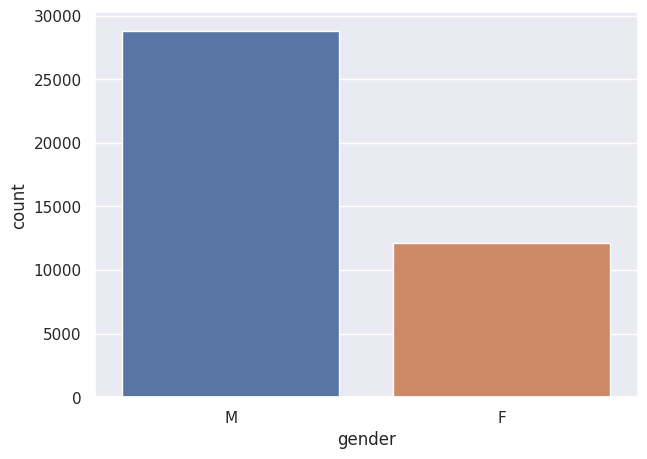

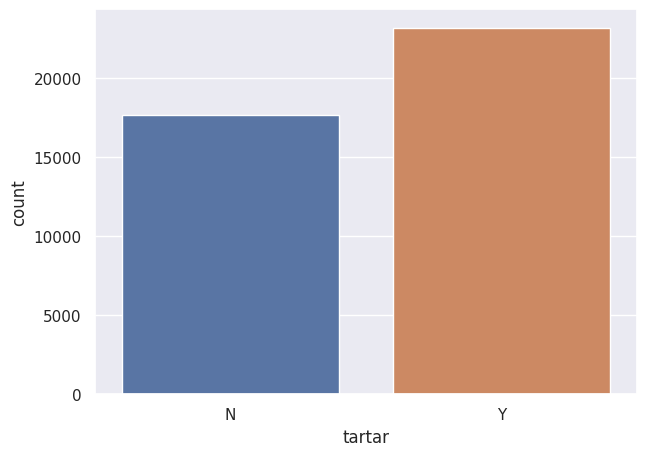

In [585]:
for column in categorical_columns:
    plt.figure(figsize = (7, 5))
    sns.countplot(data = df_balanced, x = column)
    plt.show()

In [586]:
df_balanced_copy = pd.get_dummies(data = df_balanced_copy, columns = categorical_columns, drop_first = True, dtype = 'int32')

In [587]:
df_balanced_copy.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,serum creatinine,AST,ALT,Gtp,oral,dental caries,smoking,bmi,gender_M,tartar_Y
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,1.0,21.0,16.0,22.0,Y,0,1,20.761246,1,0
6,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,82.0,...,0.7,21.0,27.0,39.0,Y,1,1,23.437500,1,1
12,35,170,70,81.0,1.5,1.0,1.0,1.0,130.0,88.0,...,0.9,21.0,27.0,83.0,Y,0,1,24.221453,1,0
17,35,165,70,87.5,1.0,0.8,1.0,1.0,112.0,70.0,...,0.9,37.0,43.0,30.0,Y,0,1,25.711662,1,1
18,60,165,65,79.0,1.0,1.0,1.0,1.0,124.0,84.0,...,0.9,23.0,19.0,36.0,Y,0,1,23.875115,1,0


In [588]:
df_balanced_copy.drop(columns = ['oral'], axis = 1, inplace = True)

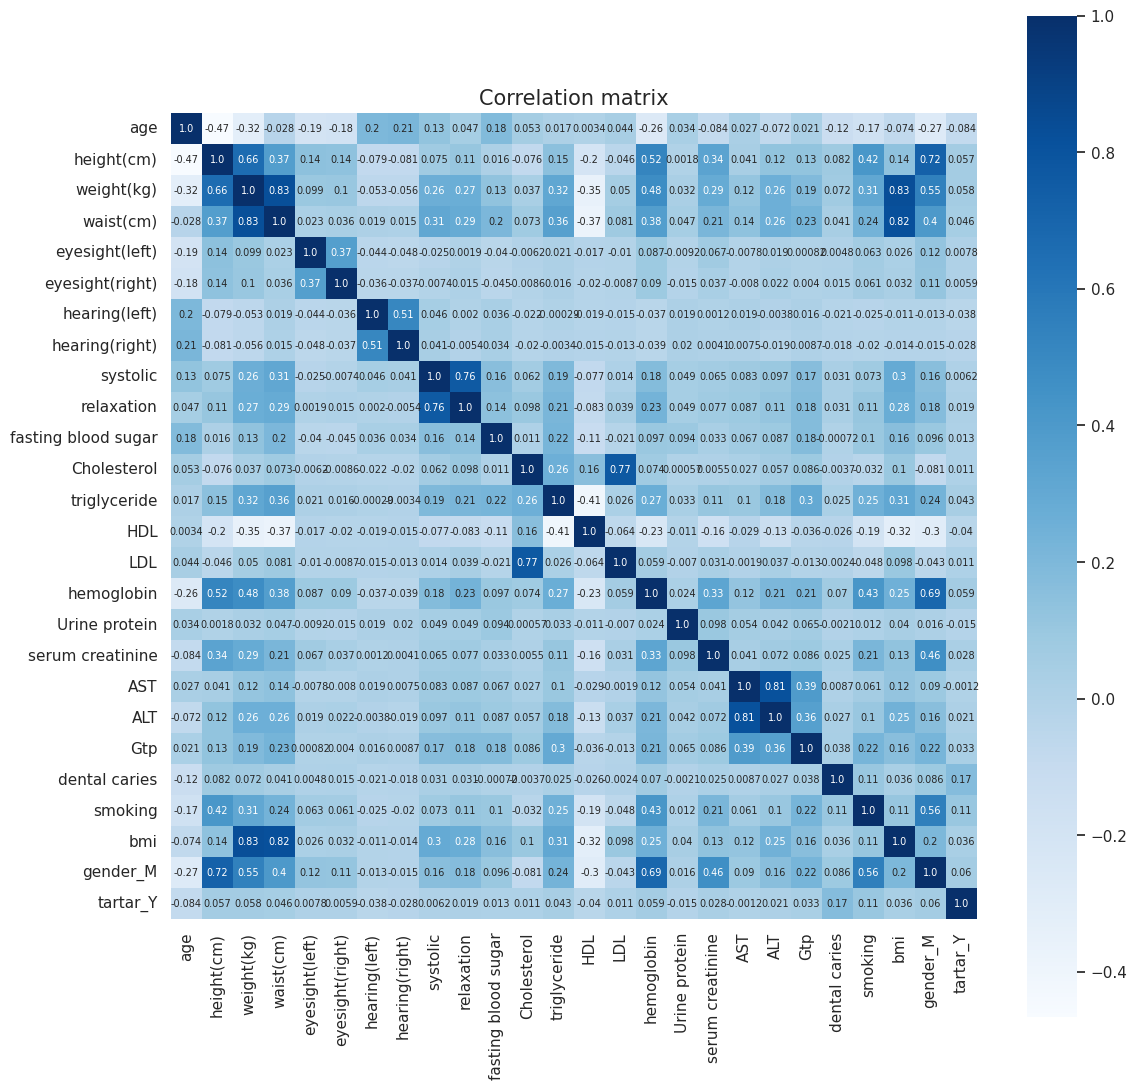

In [589]:
plt.figure(figsize = (13, 13))
sns.heatmap(df_balanced_copy.corr(), annot = True, cbar = True, square = True, annot_kws = {'size': 7}, fmt = '.2', cmap = 'Blues')
plt.title('Correlation matrix', fontsize = 15)
plt.show()

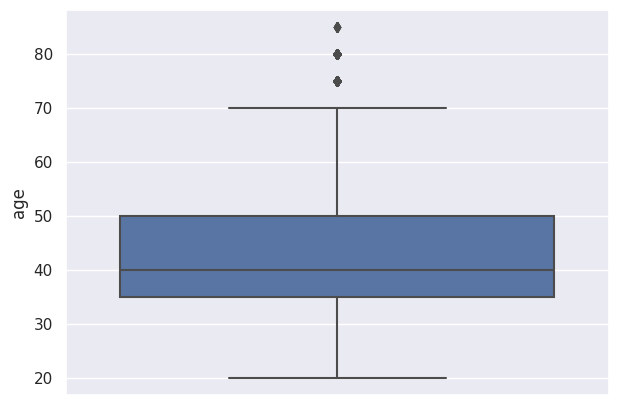

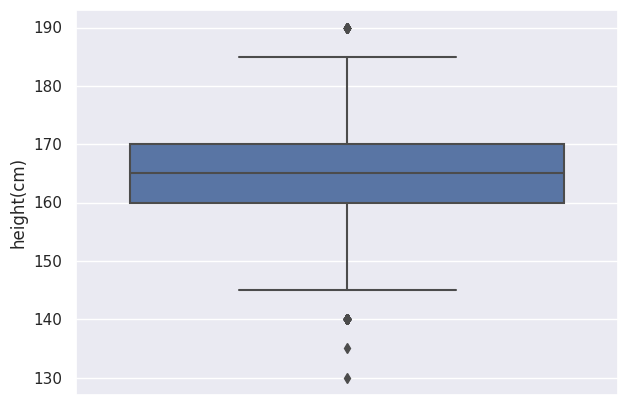

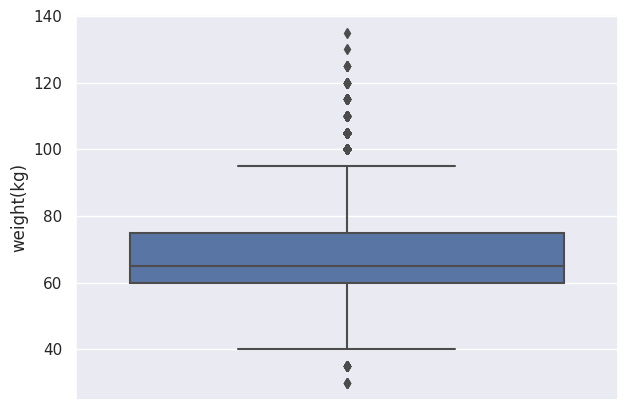

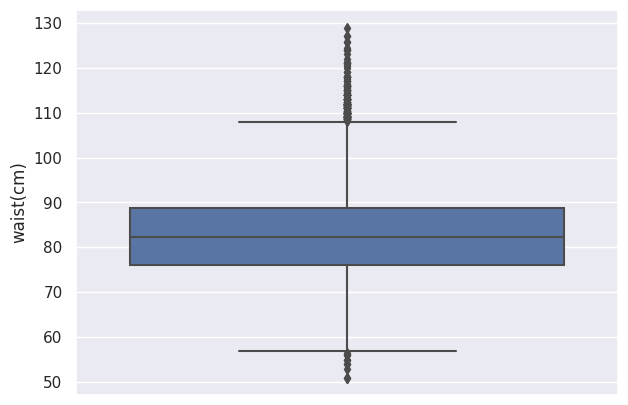

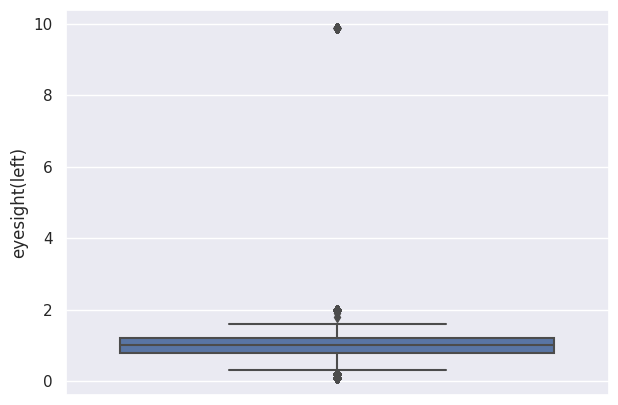

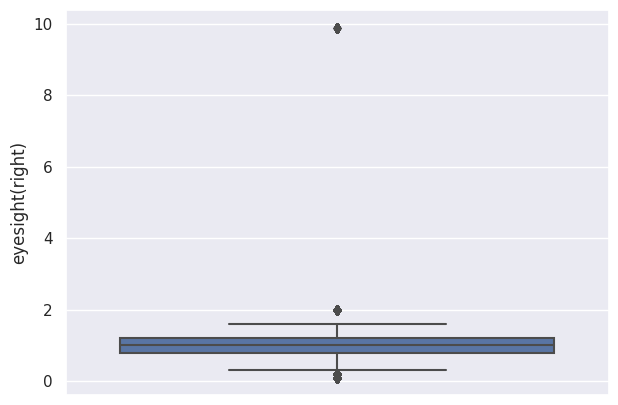

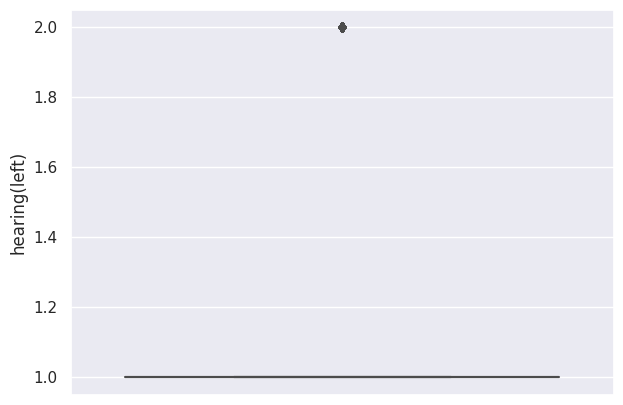

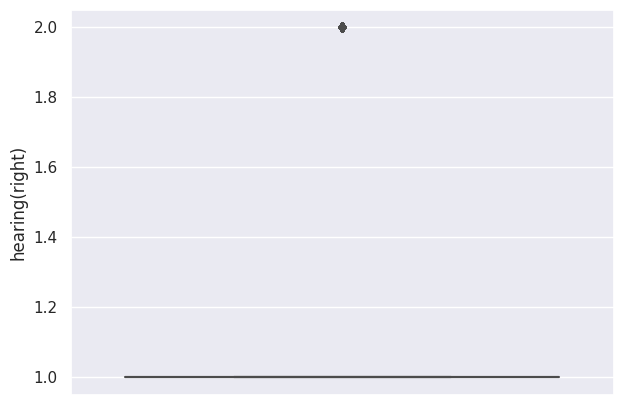

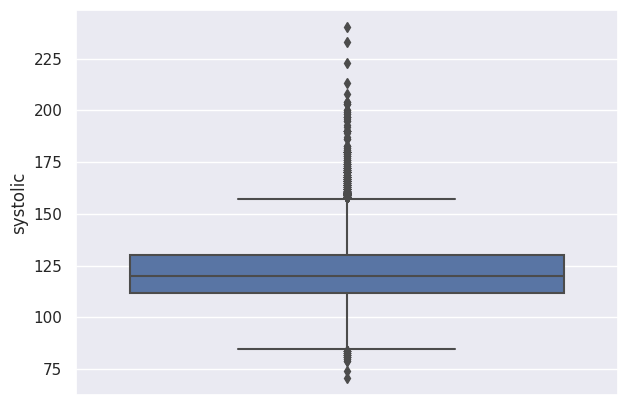

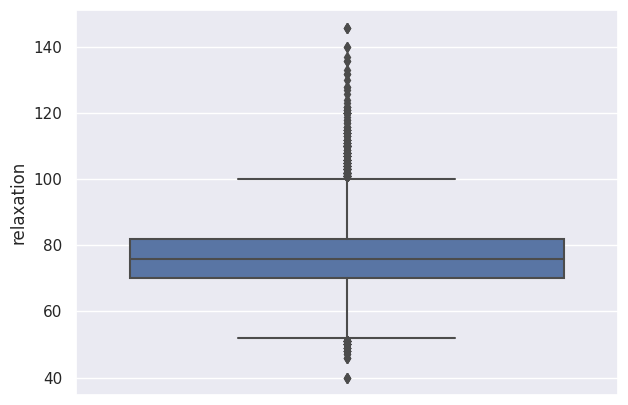

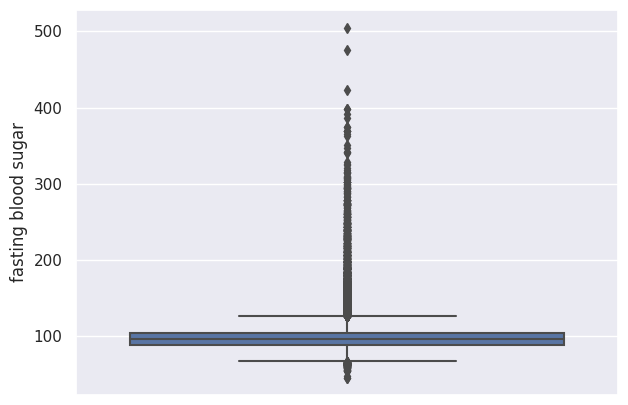

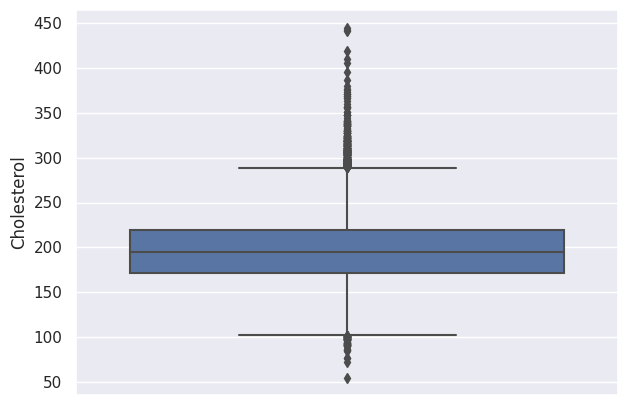

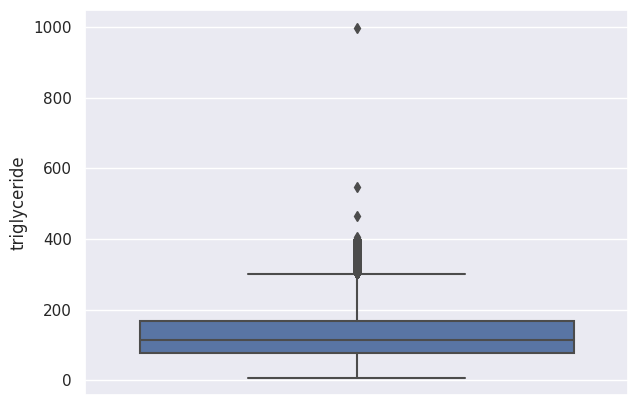

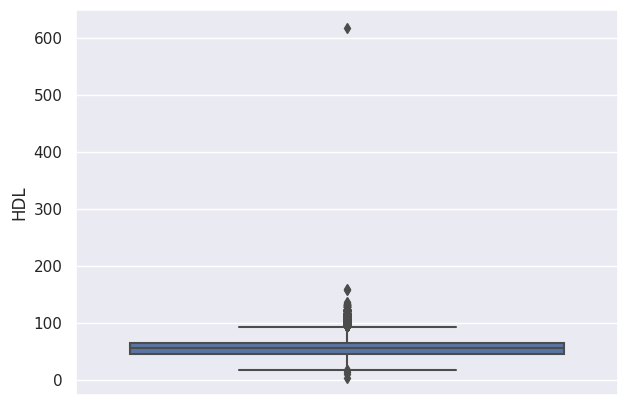

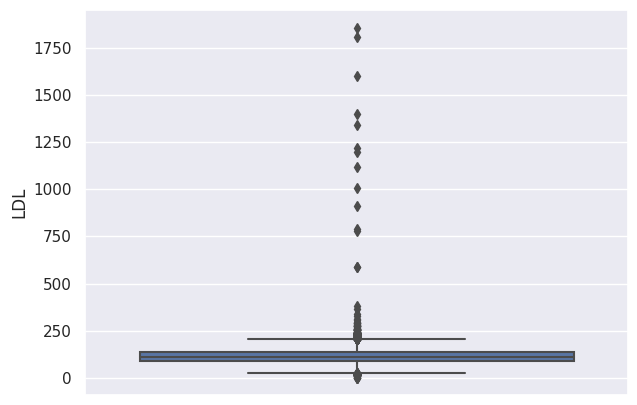

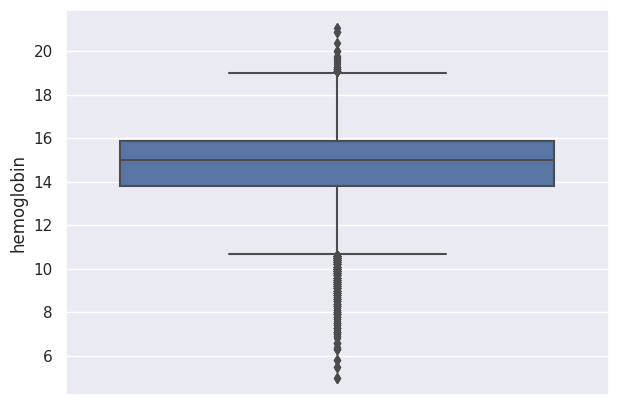

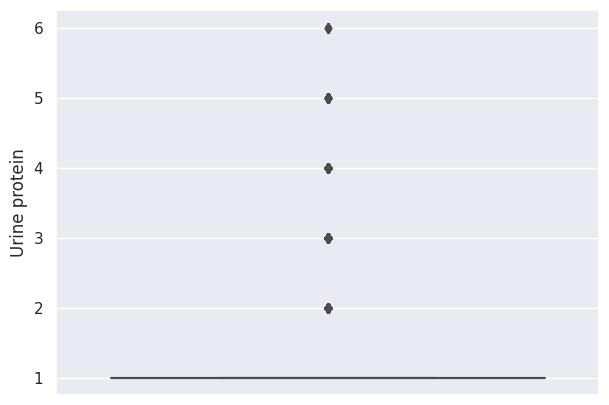

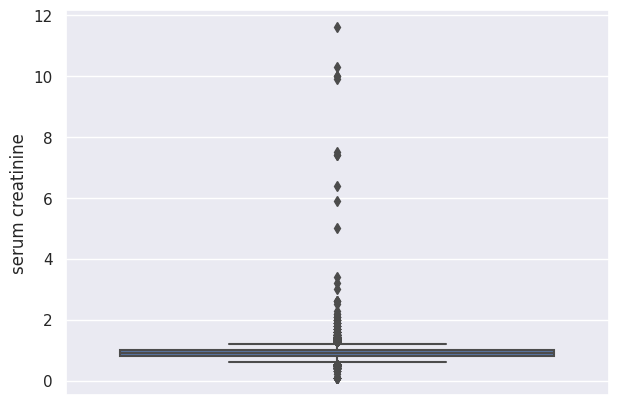

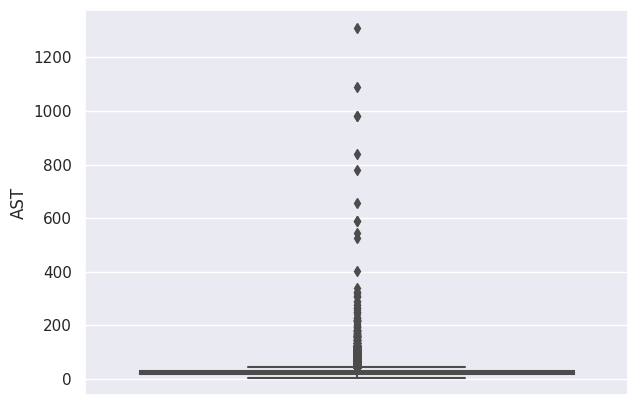

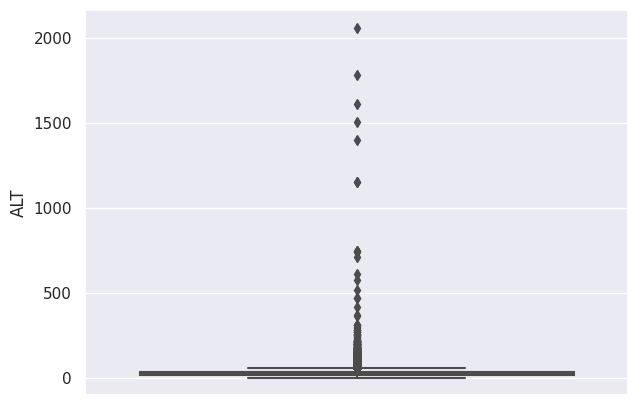

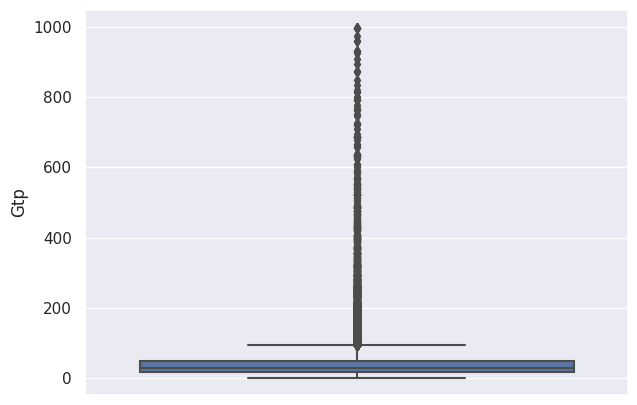

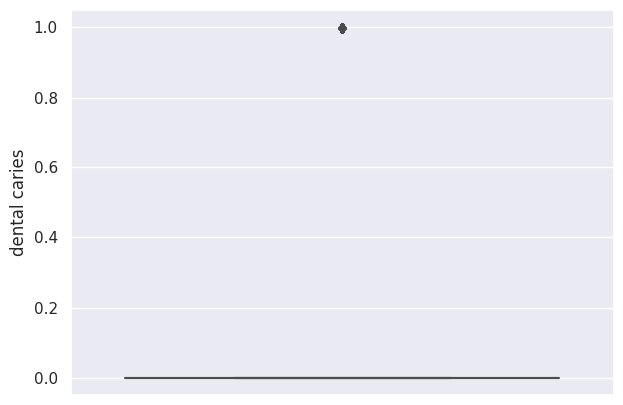

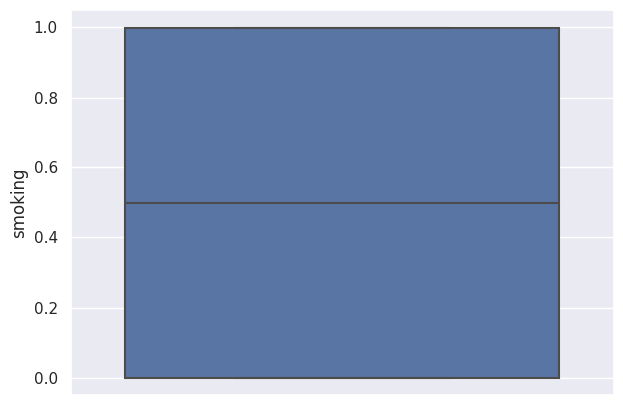

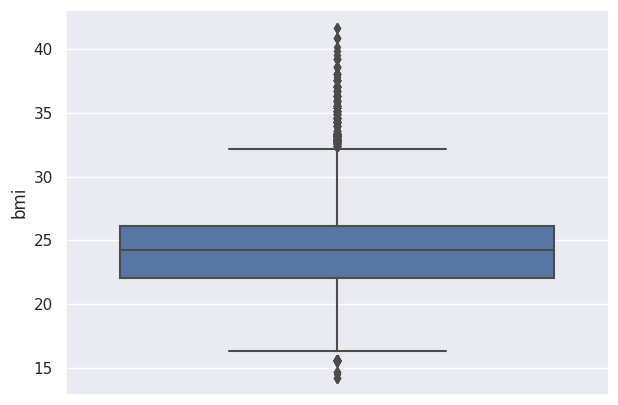

In [590]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df_balanced, y = column)
    plt.show()

In [591]:
df_balanced[df_balanced['age'] > 70].shape

(578, 26)

In [592]:
df_balanced = df_balanced[df_balanced['age'] < 70]

In [593]:
df_balanced[df_balanced['height(cm)'] > 185].shape

(26, 26)

In [594]:
df_balanced = df_balanced[df_balanced['height(cm)'] < 185]

In [595]:
df_balanced[df_balanced['height(cm)'] < 145].shape

(82, 26)

In [596]:
df_balanced = df_balanced[df_balanced['height(cm)'] > 145]

In [597]:
df_balanced[df_balanced['weight(kg)'] > 97].shape 

(596, 26)

In [598]:
df_balanced = df_balanced[df_balanced['weight(kg)'] < 97]

In [599]:
df_balanced[df_balanced['weight(kg)'] < 45].shape

(202, 26)

In [600]:
df_balanced = df_balanced[df_balanced['weight(kg)'] > 45]

In [601]:
df_balanced[df_balanced['waist(cm)'] > 109].shape

(40, 26)

In [602]:
df_balanced = df_balanced[df_balanced['waist(cm)'] < 109]

In [603]:
df_balanced[df_balanced['waist(cm)'] < 59].shape

(6, 26)

In [604]:
df_balanced = df_balanced[df_balanced['waist(cm)'] > 59]

In [605]:
df_balanced[df_balanced['eyesight(left)'] > 1.9].shape

(346, 26)

In [606]:
df_balanced = df_balanced[df_balanced['eyesight(left)'] < 1.9]

In [607]:
df_balanced[df_balanced['eyesight(left)'] < 0.2].shape

(189, 26)

In [608]:
df_balanced = df_balanced[df_balanced['eyesight(left)'] > 0.2]

In [609]:
df_balanced[df_balanced['eyesight(right)'] > 1.9].shape

(192, 26)

In [610]:
df_balanced = df_balanced[df_balanced['eyesight(right)'] < 1.9]

In [611]:
df_balanced[df_balanced['eyesight(right)'] < 0.2].shape

(132, 26)

In [612]:
df_balanced = df_balanced[df_balanced['eyesight(right)'] > 0.2]

In [613]:
df_balanced[df_balanced['hearing(left)'] > 1.8].shape

(643, 26)

In [614]:
df_balanced = df_balanced[df_balanced['hearing(left)'] < 1.8]

In [615]:
df_balanced[df_balanced['hearing(right)'] > 1.8].shape

(354, 26)

In [616]:
df_balanced = df_balanced[df_balanced['hearing(right)'] < 1.8]

In [617]:
df_balanced.shape

(34109, 26)

In [618]:
df_balanced[df_balanced['systolic'] > 158].shape

(321, 26)

In [619]:
df_balanced = df_balanced[df_balanced['systolic'] < 158]

In [620]:
df_balanced[df_balanced['systolic'] < 85].shape

(23, 26)

In [621]:
df_balanced = df_balanced[df_balanced['systolic'] > 85]

In [622]:
df_balanced[df_balanced['relaxation'] > 98].shape

(469, 26)

In [623]:
df_balanced = df_balanced[df_balanced['relaxation'] < 98]

In [624]:
df_balanced[df_balanced['relaxation'] < 53].shape

(76, 26)

In [625]:
df_balanced = df_balanced[df_balanced['relaxation'] > 53]

In [626]:
df_balanced[df_balanced['fasting blood sugar'] > 130].shape

(1575, 26)

In [627]:
df_balanced = df_balanced[df_balanced['fasting blood sugar'] < 130]

In [628]:
df_balanced[df_balanced['fasting blood sugar'] < 60].shape

(13, 26)

In [629]:
df_balanced = df_balanced[df_balanced['fasting blood sugar'] > 60]

In [630]:
df_balanced[df_balanced['Cholesterol'] > 290].shape

(325, 26)

In [631]:
df_balanced = df_balanced[df_balanced['Cholesterol'] < 290]

In [632]:
df_balanced[df_balanced['Cholesterol'] < 90].shape

(4, 26)

In [633]:
df_balanced = df_balanced[df_balanced['Cholesterol'] > 90]

In [634]:
df_balanced[df_balanced['triglyceride'] > 310].shape

(866, 26)

In [635]:
df_balanced = df_balanced[df_balanced['triglyceride'] < 310]

In [636]:
df_balanced[df_balanced['HDL'] > 98].shape

(305, 26)

In [637]:
df_balanced = df_balanced[df_balanced['HDL'] < 98]

In [638]:
df_balanced[df_balanced['HDL'] < 10].shape

(0, 26)

In [639]:
df_balanced = df_balanced[df_balanced['HDL'] > 10]

In [640]:
df_balanced[df_balanced['LDL'] > 200].shape

(101, 26)

In [641]:
df_balanced = df_balanced[df_balanced['LDL'] < 200]

In [642]:
df_balanced[df_balanced['LDL'] < 30].shape

(45, 26)

In [643]:
df_balanced = df_balanced[df_balanced['LDL'] > 30]

In [644]:
df_balanced[df_balanced['hemoglobin'] > 19].shape

(18, 26)

In [645]:
df_balanced = df_balanced[df_balanced['hemoglobin'] < 19]

In [646]:
df_balanced[df_balanced['hemoglobin'] < 10.5].shape

(329, 26)

In [647]:
df_balanced = df_balanced[df_balanced['hemoglobin'] > 10.5]

In [648]:
df_balanced[df_balanced['Urine protein'] > 1.9].shape

(1478, 26)

In [649]:
df_balanced = df_balanced[df_balanced['Urine protein'] < 1.9]

In [650]:
df_balanced[df_balanced['serum creatinine'] > 1.25].shape

(658, 26)

In [651]:
df_balanced = df_balanced[df_balanced['serum creatinine'] < 1.25]

In [652]:
df_balanced[df_balanced['serum creatinine'] < 0.6].shape

(596, 26)

In [653]:
df_balanced = df_balanced[df_balanced['serum creatinine'] > 0.6]

In [654]:
df_balanced[df_balanced['AST'] > 50].shape

(743, 26)

In [655]:
df_balanced = df_balanced[df_balanced['AST'] < 50]

In [656]:
df_balanced[df_balanced['ALT'] > 60].shape

(731, 26)

In [657]:
df_balanced = df_balanced[df_balanced['ALT'] < 60]

In [658]:
df_balanced[df_balanced['Gtp'] > 100].shape

(1005, 26)

In [659]:
df_balanced = df_balanced[df_balanced['Gtp'] < 100]

In [660]:
df_balanced[df_balanced['dental caries'] > 0.9].shape

(5074, 26)

In [661]:
df_balanced[df_balanced['bmi'] > 32].shape

(193, 26)

In [662]:
df_balanced = df_balanced[df_balanced['bmi'] < 32]

In [663]:
df_balanced[df_balanced['bmi'] < 16.5].shape

(24, 26)

In [664]:
df_balanced = df_balanced[df_balanced['bmi'] > 16.5]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


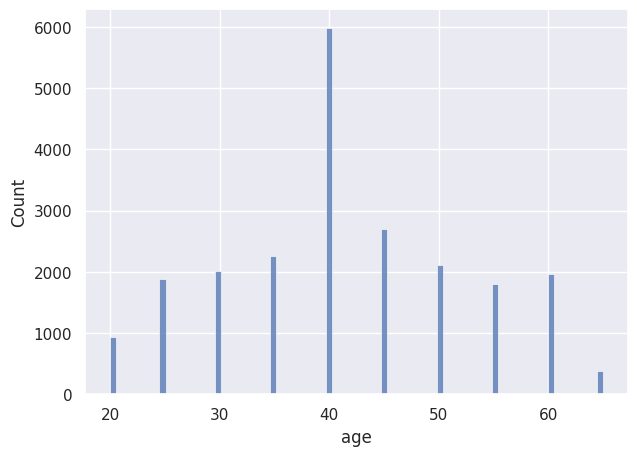

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


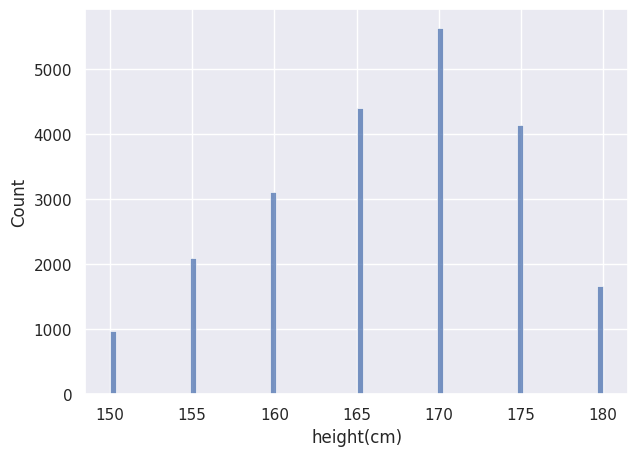

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


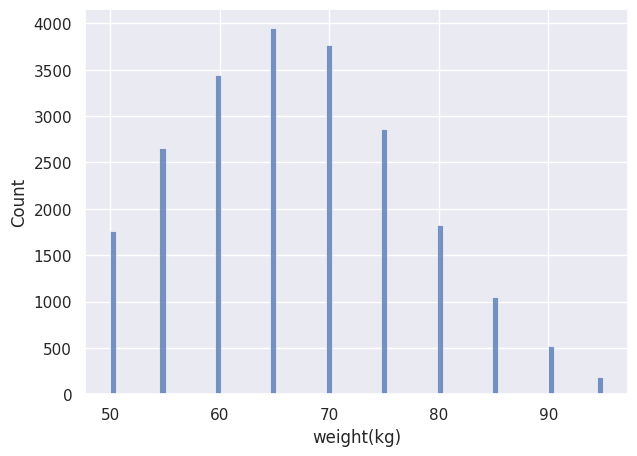

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


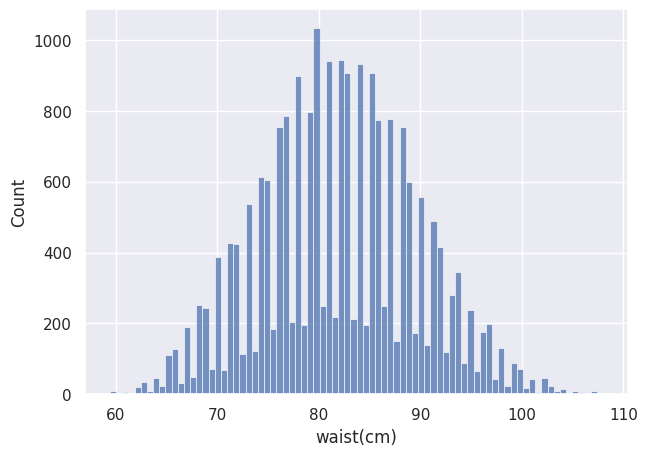

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


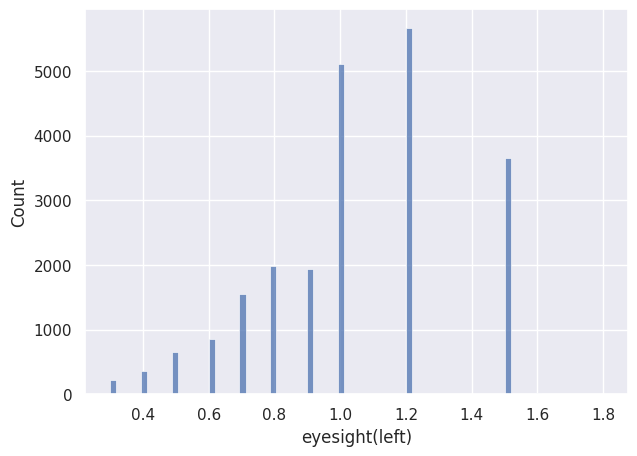

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


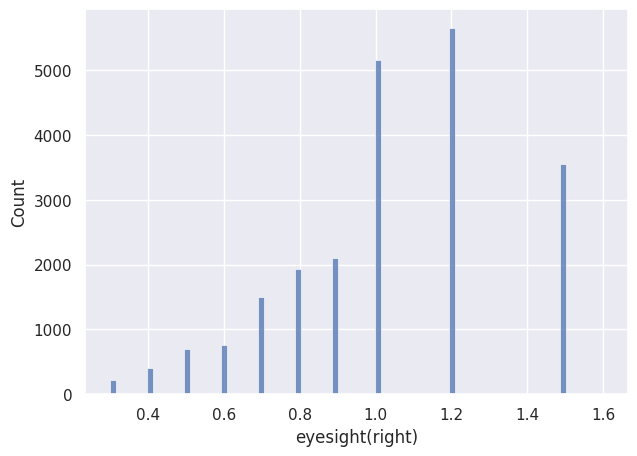

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


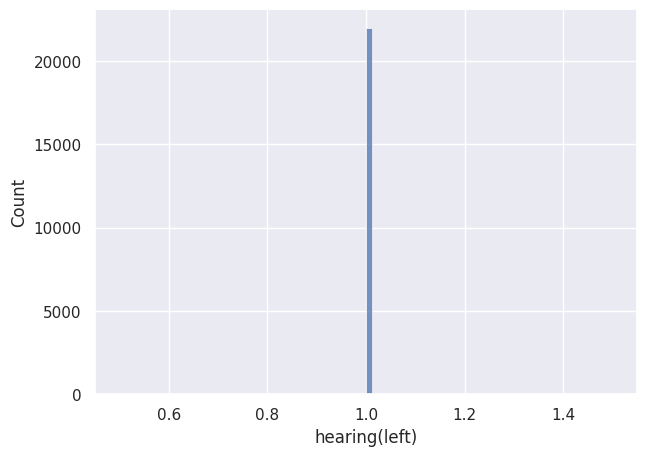

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


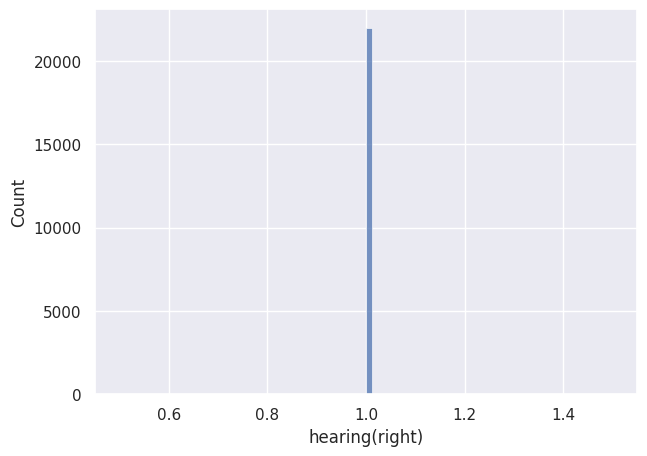

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


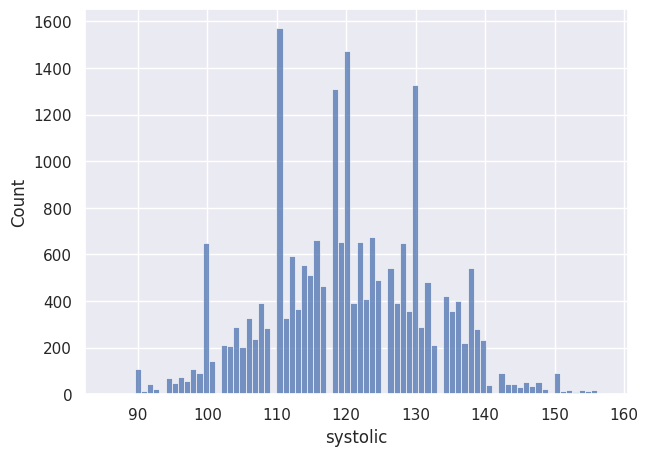

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


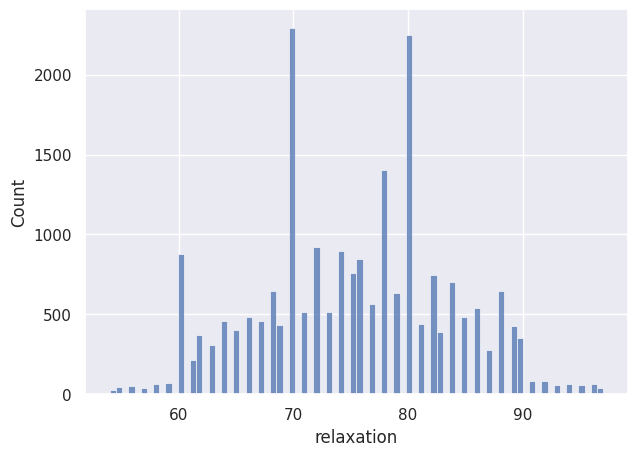

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


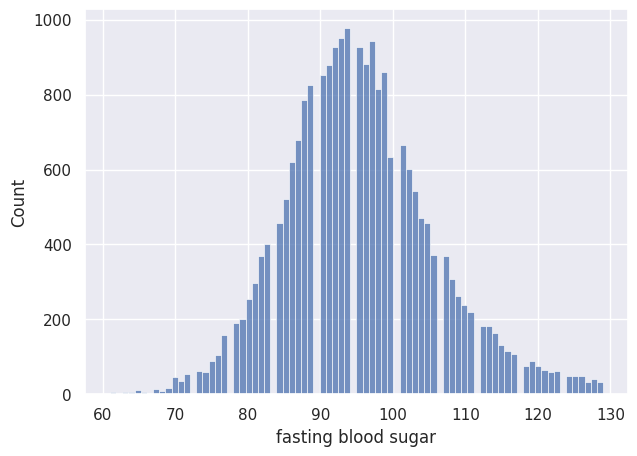

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


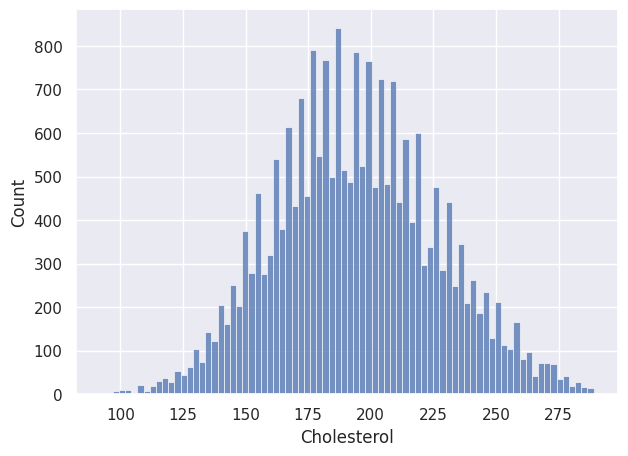

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


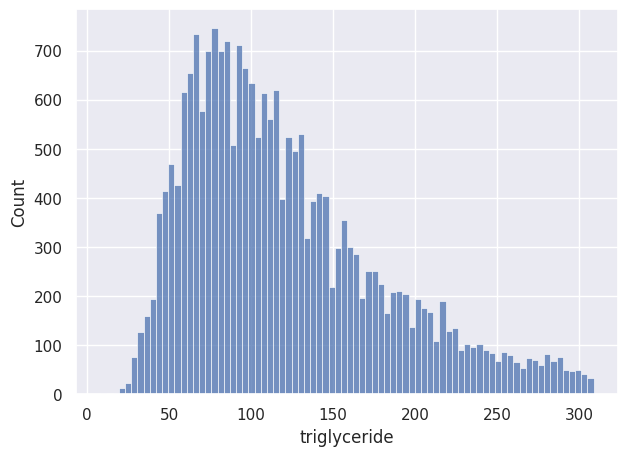

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


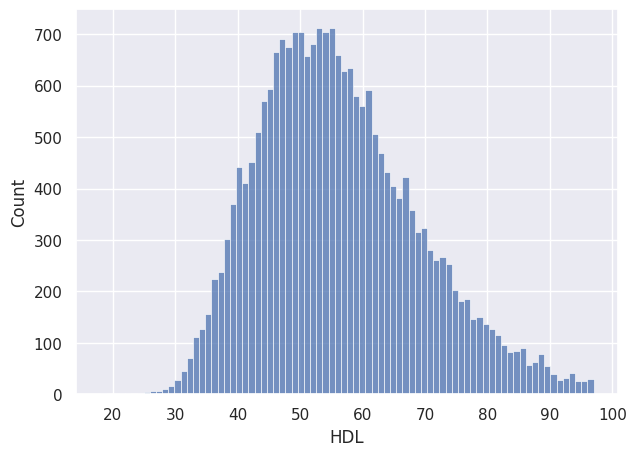

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


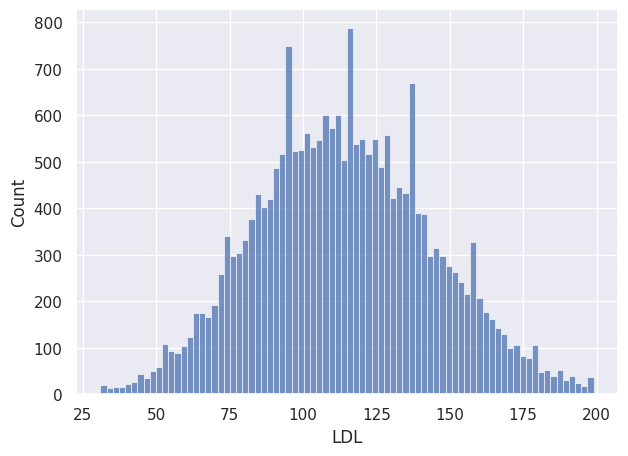

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


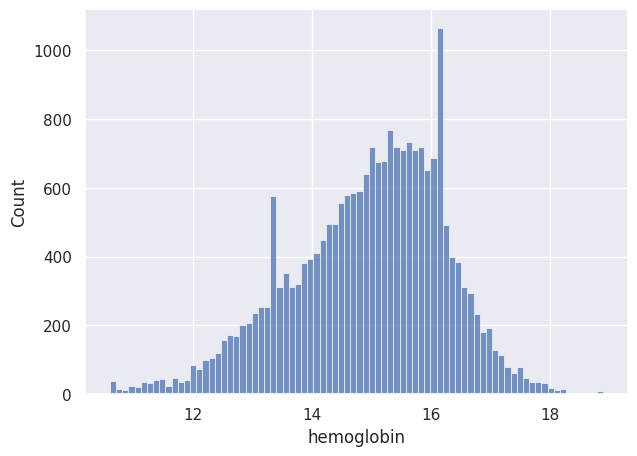

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


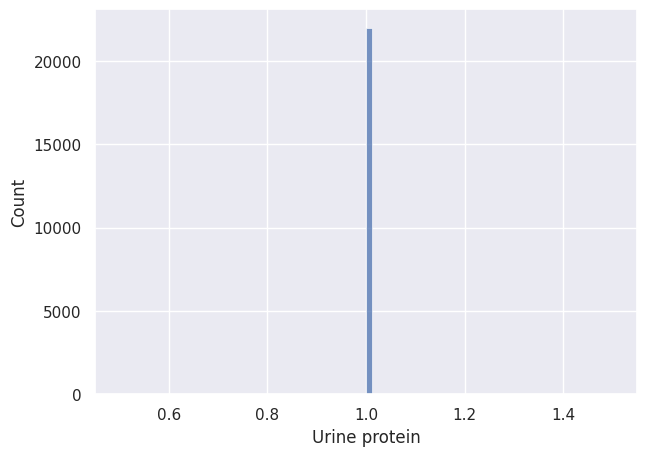

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


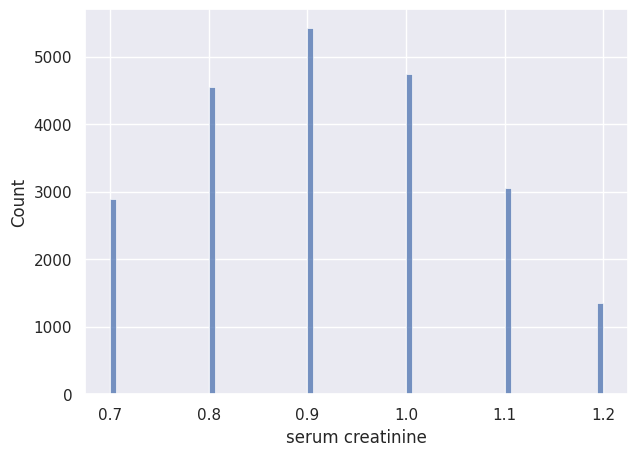

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


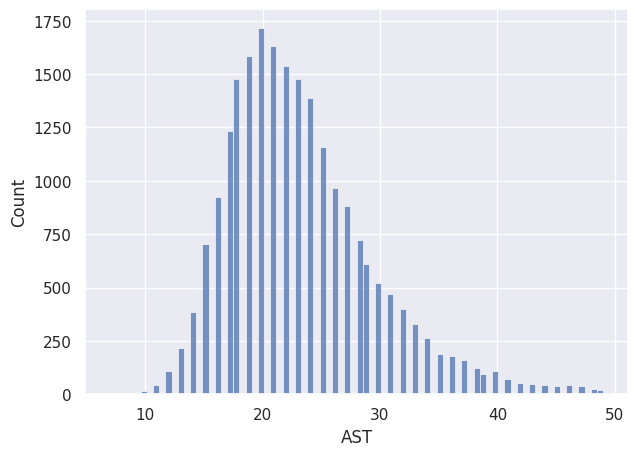

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


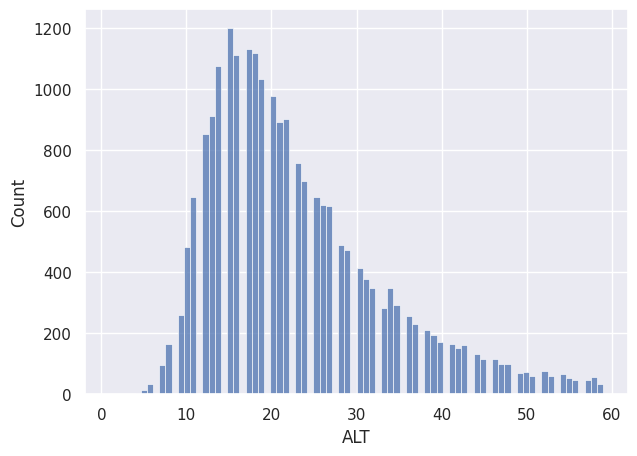

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


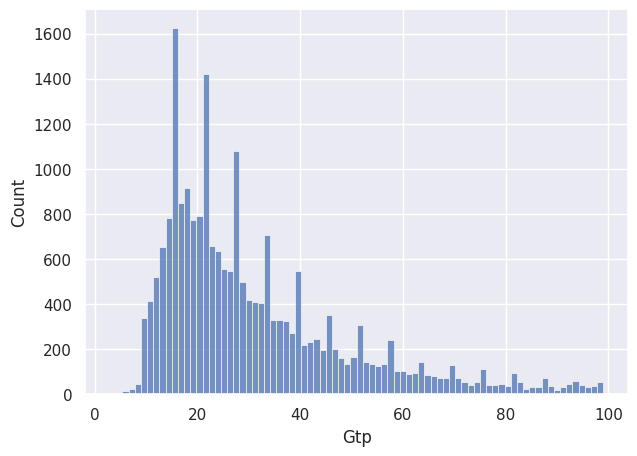

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


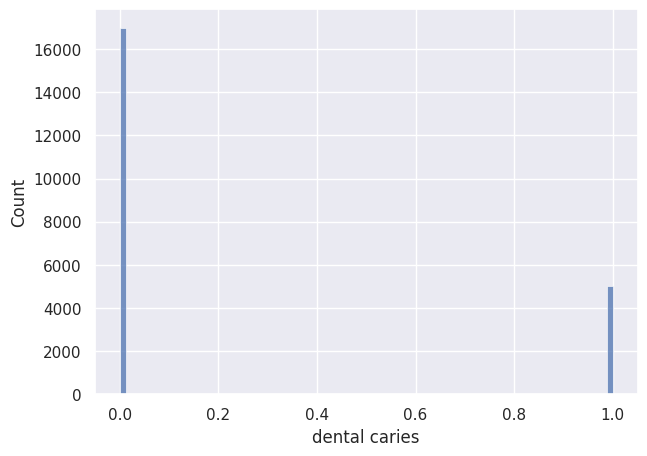

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


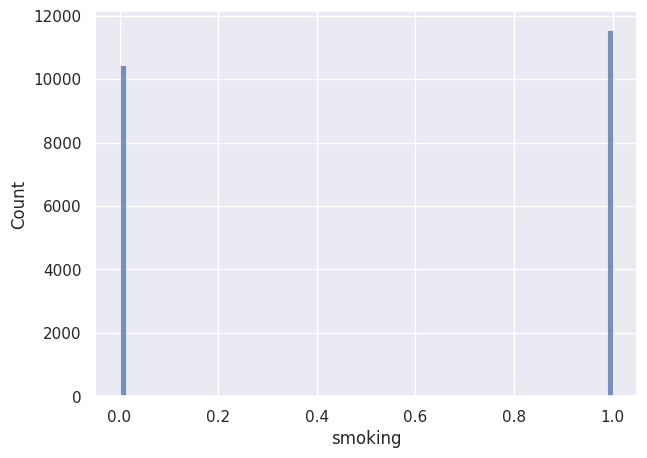

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


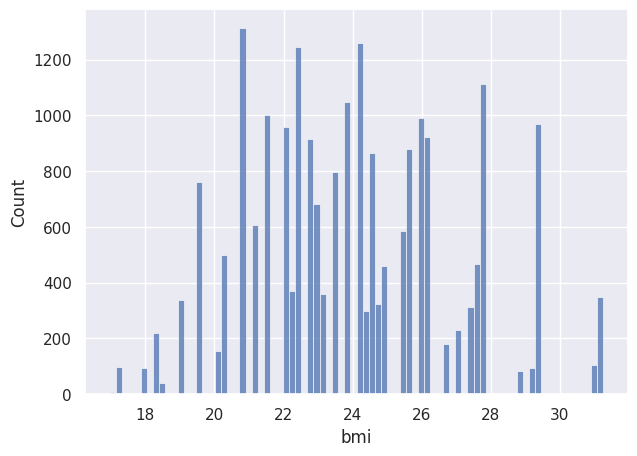

In [665]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df_balanced, x = column, bins = 80)
    plt.show()

In [666]:
df_balanced[df_balanced['eyesight(left)'] > 1.6].shape

(1, 26)

In [667]:
df_balanced = df_balanced[df_balanced['eyesight(left)'] < 1.6]

In [668]:
df_balanced[df_balanced['eyesight(left)'] < 0.4].shape

(224, 26)

In [669]:
df_balanced = df_balanced[df_balanced['eyesight(left)'] > 0.4]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


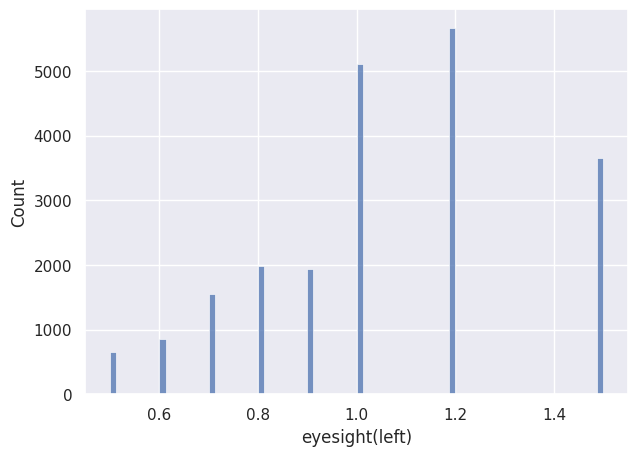

In [670]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df_balanced, x = 'eyesight(left)', bins = 80)
plt.show()

In [671]:
df_balanced[df_balanced['eyesight(right)'] < 0.4].shape

(136, 26)

In [672]:
df_balanced = df_balanced[df_balanced['eyesight(right)'] > 0.4]

In [673]:
df_balanced.shape

(20997, 26)

In [674]:
df_balanced[df_balanced['hearing(left)'] == 1].shape

(20997, 26)

In [675]:
df_balanced.drop(columns = ['hearing(left)', 'hearing(right)'], axis = 1, inplace = True)

In [676]:
numerical_columns.remove('hearing(left)')
numerical_columns.remove('hearing(right)')

In [677]:
df_balanced[df_balanced['systolic'] > 150].shape

(91, 24)

In [678]:
df_balanced = df_balanced[df_balanced['systolic'] < 150]

In [679]:
df_balanced[df_balanced['relaxation'] > 90].shape

(371, 24)

In [680]:
df_balanced = df_balanced[df_balanced['relaxation'] < 90]

In [681]:
df_balanced[df_balanced['relaxation'] < 60].shape

(284, 24)

In [682]:
df_balanced = df_balanced[df_balanced['relaxation'] > 60]

In [683]:
df_balanced[df_balanced['hemoglobin'] > 18].shape

(42, 24)

In [684]:
df_balanced = df_balanced[df_balanced['hemoglobin'] < 18]

In [685]:
df_balanced[df_balanced['hemoglobin'] < 12].shape

(335, 24)

In [686]:
df_balanced = df_balanced[df_balanced['hemoglobin'] > 12]

In [687]:
df_balanced[df_balanced['Urine protein'] == 1].shape

(18589, 24)

In [688]:
df_balanced.shape

(18589, 24)

In [689]:
df_balanced.drop(columns = ['Urine protein'], axis = 1, inplace = True)

In [690]:
numerical_columns.remove('Urine protein')

In [691]:
df_balanced[df_balanced['AST'] > 40].shape

(308, 23)

In [692]:
df_balanced = df_balanced[df_balanced['AST'] < 40]

In [693]:
df_balanced[df_balanced['ALT'] > 50].shape

(328, 23)

In [694]:
df_balanced = df_balanced[df_balanced['ALT'] < 50]

In [695]:
df_balanced[df_balanced['Gtp'] > 80].shape

(459, 23)

In [696]:
df_balanced = df_balanced[df_balanced['Gtp'] < 80]

In [697]:
df_balanced.shape

(17328, 23)

In [698]:
df_balanced.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,bmi
2,M,55,170,60,80.0,0.8,0.8,138.0,86.0,89.0,...,151.0,15.8,1.0,21.0,16.0,22.0,0,N,1,20.761246
6,M,40,160,60,85.5,1.0,1.0,116.0,82.0,94.0,...,157.0,17.0,0.7,21.0,27.0,39.0,1,Y,1,23.437500
18,M,60,165,65,79.0,1.0,1.0,124.0,84.0,115.0,...,43.0,17.0,0.9,23.0,19.0,36.0,0,N,1,23.875115
27,M,60,160,70,91.0,0.7,0.7,130.0,80.0,87.0,...,132.0,14.7,1.0,31.0,41.0,70.0,0,N,1,27.343750
32,M,20,180,90,95.0,0.9,0.9,138.0,74.0,92.0,...,62.0,15.3,0.7,18.0,27.0,35.0,0,Y,1,27.777778


In [699]:
df_balanced['smoking'].value_counts()

smoking
1    9216
0    8112
Name: count, dtype: int64

In [700]:
numerical_columns.remove('smoking')

In [701]:
scaler = StandardScaler()

In [702]:
X = df_balanced.drop(columns = ['smoking'], axis = 1)
y = df_balanced['smoking']

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

In [704]:
print('The training set size is:', len(X_train))
print('The test set size is:', len(X_test))

The training set size is: 13862
The test set size is: 3466


In [705]:
X_train.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,tartar,bmi
51360,M,40,175,75,89.7,1.0,1.0,109.0,70.0,109.0,...,52.0,107.0,16.1,1.0,27.0,29.0,54.0,1,N,24.489796
45466,F,40,155,50,73.0,1.2,1.0,122.0,82.0,98.0,...,75.0,97.0,12.3,0.7,18.0,13.0,12.0,0,Y,20.811655
15860,M,45,170,70,86.0,1.2,1.5,127.0,77.0,115.0,...,48.0,82.0,17.5,1.0,30.0,21.0,59.0,0,Y,24.221453
33468,M,55,165,70,85.0,1.0,1.0,116.0,70.0,94.0,...,59.0,112.0,16.1,1.0,23.0,19.0,61.0,0,N,25.711662
54001,M,40,165,65,81.5,1.0,1.2,128.0,80.0,91.0,...,65.0,136.0,16.3,1.2,25.0,29.0,41.0,1,Y,23.875115


In [706]:
X_train_dummies = pd.get_dummies(data = X_train, columns = categorical_columns, drop_first = True, dtype = 'int32')

In [707]:
X_train_dummies.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,bmi,gender_M,tartar_Y
51360,40,175,75,89.7,1.0,1.0,109.0,70.0,109.0,179.0,...,107.0,16.1,1.0,27.0,29.0,54.0,1,24.489796,1,0
45466,40,155,50,73.0,1.2,1.0,122.0,82.0,98.0,183.0,...,97.0,12.3,0.7,18.0,13.0,12.0,0,20.811655,0,1
15860,45,170,70,86.0,1.2,1.5,127.0,77.0,115.0,188.0,...,82.0,17.5,1.0,30.0,21.0,59.0,0,24.221453,1,1
33468,55,165,70,85.0,1.0,1.0,116.0,70.0,94.0,205.0,...,112.0,16.1,1.0,23.0,19.0,61.0,0,25.711662,1,0
54001,40,165,65,81.5,1.0,1.2,128.0,80.0,91.0,241.0,...,136.0,16.3,1.2,25.0,29.0,41.0,1,23.875115,1,1


In [708]:
X_train_scaled = scaler.fit_transform(X_train_dummies)

In [709]:
X_train_scaled

array([[-0.09169274,  0.99587487,  0.77700386, ...,  0.20531353,
         0.52151367, -1.16099084],
       [-0.09169274, -1.59099245, -1.67358485, ..., -1.09147676,
        -1.91749527,  0.86133324],
       [ 0.36111978,  0.34915804,  0.28688612, ...,  0.11070485,
         0.52151367,  0.86133324],
       ...,
       [ 1.71955732, -0.94427562, -0.69334937, ..., -0.165691  ,
         0.52151367,  0.86133324],
       [ 0.36111978,  0.34915804, -0.69334937, ..., -1.10924924,
         0.52151367,  0.86133324],
       [ 0.36111978,  0.99587487, -0.20323162, ..., -0.94592477,
         0.52151367,  0.86133324]])

In [710]:
x1 = sm.add_constant(X_train_scaled)
model = sm.Logit(y_train, x1).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.522039
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                smoking   No. Observations:                13862
Model:                          Logit   Df Residuals:                    13839
Method:                           MLE   Df Model:                           22
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.2446
Time:                        13:50:54   Log-Likelihood:                -7236.5
converged:                       True   LL-Null:                       -9580.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0241      0.023     -1.041      0.298      -0.069       0.021
x1             0.1226      0.025      4.927      0.000       0.074       0.171
x2            -0.0223      0.214     -0.104      0.917      -0.442       0.398
x3             0.3016      0.344      0.878      0.380      -0.372       0.975
x4            -0.1265      0.039     -3.258      0.001      -0.203      -0.050
x5            -0.0326      0.027     -1.229      0.219      -0.085       0.019
x6             0.0201      0.026      0.760      0.447      -0.032       0.072
x7            -0.1372      0.027     -5.016      0.000      -0.191      -0.084
x8             0.0788      0.027      2.916      0.004       0.026       0.132
x9            -0.0075      0.022     -0.344      0.731      -0.050       0.035
x10            0.1190      0.213      0.559      0.576      -0.298       0.536
x11            0.2076      0.080      2.592      0.010       0.051       0.365
x12           -0.1194      0.088     -1.358      0.174      -0.292       0.053
x13           -0.2318      0.197     -1.174      0.240      -0.619       0.155
x14            0.1653      0.028      5.909      0.000       0.110       0.220
x15           -0.1321      0.022     -5.884      0.000      -0.176      -0.088
x16           -0.1103      0.027     -4.112      0.000      -0.163      -0.058
x17           -0.1647      0.029     -5.628      0.000      -0.222      -0.107
x18            0.4393      0.026     16.784      0.000       0.388       0.491
x19            0.1607      0.021      7.668      0.000       0.120       0.202
x20           -0.2810      0.276     -1.017      0.309      -0.823       0.261
x21            1.2000      0.042     28.468      0.000       1.117       1.283
x22            0.1777      0.021      8.663      0.000       0.138       0.218
==============================================================================
"""

In [711]:
X_train_dummies.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'bmi',
       'gender_M', 'tartar_Y'],
      dtype='object')

In [712]:
X_train_dummies2 = X_train_dummies.drop(columns = ['height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)', 'fasting blood sugar',
                                                   'Cholesterol', 'HDL', 'LDL', 'bmi'], axis = 1)

In [713]:
X_train_dummies2.head()

,age,waist(cm),systolic,relaxation,triglyceride,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,gender_M,tartar_Y
51360,40,89.7,109.0,70.0,101.0,16.1,1.0,27.0,29.0,54.0,1,1,0
45466,40,73.0,122.0,82.0,55.0,12.3,0.7,18.0,13.0,12.0,0,0,1
15860,45,86.0,127.0,77.0,289.0,17.5,1.0,30.0,21.0,59.0,0,1,1
33468,55,85.0,116.0,70.0,170.0,16.1,1.0,23.0,19.0,61.0,0,1,0
54001,40,81.5,128.0,80.0,200.0,16.3,1.2,25.0,29.0,41.0,1,1,1


In [714]:
X_train_scaled2 = scaler.fit_transform(X_train_dummies2)

In [715]:
x2 = sm.add_constant(X_train_scaled2)
model2 = sm.Logit(y_train, x2).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.524872
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                smoking   No. Observations:                13862
Model:                          Logit   Df Residuals:                    13848
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.2405
Time:                        13:50:54   Log-Likelihood:                -7275.8
converged:                       True   LL-Null:                       -9580.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0249      0.023     -1.080      0.280      -0.070       0.020
x1             0.0747      0.022      3.463      0.001       0.032       0.117
x2            -0.1239      0.024     -5.233      0.000      -0.170      -0.077
x3            -0.1387      0.027     -5.119      0.000      -0.192      -0.086
x4             0.0734      0.027      2.725      0.006       0.021       0.126
x5             0.2660      0.023     11.562      0.000       0.221       0.311
x6             0.1494      0.028      5.381      0.000       0.095       0.204
x7            -0.1395      0.022     -6.280      0.000      -0.183      -0.096
x8            -0.1176      0.026     -4.437      0.000      -0.169      -0.066
x9            -0.1707      0.029     -5.942      0.000      -0.227      -0.114
x10            0.4156      0.026     16.273      0.000       0.366       0.466
x11            0.1617      0.021      7.751      0.000       0.121       0.203
x12            1.3243      0.038     35.113      0.000       1.250       1.398
x13            0.1772      0.020      8.674      0.000       0.137       0.217
==============================================================================
"""

In [716]:
X_test.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,tartar,bmi
1490,M,45,170,75,91.5,0.7,0.7,120.0,73.0,91.0,...,39.0,55.0,13.5,1.0,18.0,14.0,34.0,0,Y,25.951557
27397,M,45,175,80,89.0,1.2,1.0,132.0,88.0,100.0,...,39.0,157.0,15.6,1.0,37.0,23.0,40.0,0,N,26.122449
5021,F,40,165,65,82.0,0.8,1.0,128.0,65.0,81.0,...,74.0,104.0,13.1,0.8,24.0,12.0,17.0,0,Y,23.875115
3710,F,55,155,55,76.0,0.9,0.9,128.0,88.0,93.0,...,55.0,176.0,13.4,0.8,25.0,19.0,40.0,0,N,22.892820
39227,M,40,165,65,79.0,1.5,1.5,128.0,79.0,97.0,...,89.0,38.0,14.2,1.2,26.0,20.0,24.0,0,Y,23.875115


In [717]:
X_test_dummies = pd.get_dummies(data = X_test, columns = categorical_columns, drop_first = True, dtype = 'int32')

In [718]:
X_test_dummies = X_test_dummies.drop(columns = ['height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)', 'fasting blood sugar',
                                                   'Cholesterol', 'HDL', 'LDL', 'bmi'], axis = 1)

In [719]:
X_test_scaled = scaler.fit_transform(X_test_dummies)

In [720]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations


    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y


        for i in range(self.iterations):
            self.update_weights()
        return self


    def update_weights(self):
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))


        tmp = (A - self.Y.T)
        tmp = np.reshape(tmp, self.m)
        dw = np.dot(self.X.T, tmp) / self.m
        db = np.sum(tmp) / self.m


        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

        return self


    def predict(self, X):
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        Y = np.where(Z > 0.5, 1, 0)
        return Y

In [733]:
log_model = LogisticRegression(learning_rate = 0.01, iterations = 1000)

In [734]:
log_model.fit(X_train_scaled2, y_train)

In [735]:
y_pred = log_model.predict(X_test_scaled)

In [736]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.54      0.65      1623
           1       0.69      0.89      0.78      1843

    accuracy                           0.73      3466
   macro avg       0.75      0.72      0.71      3466
weighted avg       0.75      0.73      0.72      3466



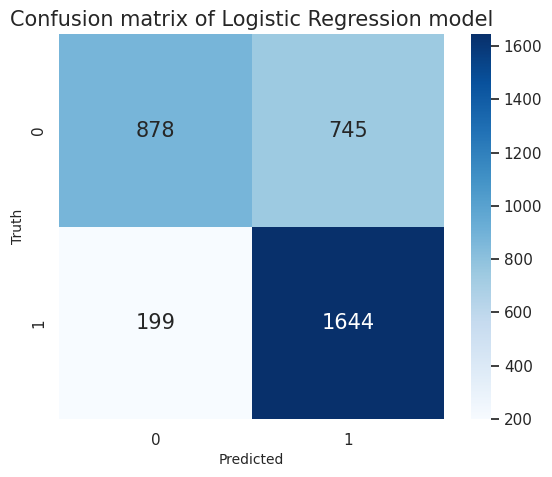

In [738]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix of Logistic Regression model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()